# Statistical Analysis of Diabetes Risk

Diabetes is one of the most prevalent chronic health conditions worldwide and poses significant challenges for healthcare systems, policymakers, and public health professionals. Early identification of individuals at elevated risk is crucial for prevention, targeted interventions, and effective resource allocation.

This project aims to analyze diabetes risk using large-scale health survey data through exploratory data analysis, statistical hypothesis testing, and logistic regression. The focus of this analysis is on understanding and interpreting key factors associated with diabetes risk.

In this Analysis I exploreed these questions:
1. Do people at diabetes risk tend to have higher body weight (BMI)?
2. Is diabetes risk more common among people with high blood pressure?
3. Does diabetes risk differ between males and females?
4. Are people who regularly consume fruits and vegetables less likely to be at diabetes risk?
5. Is difficulty in walking associated with higher diabetes risk?
6. How does overall health (general, physical, and mental health) relate to diabetes risk?
7. Are people who delay medical care due to cost more likely to be at diabetes risk?
8. Among people at diabetes risk, does age distribution differ between males and females?
9. Is diabetes risk higher among individuals with lower education or income levels?
10. Which factors are most strongly associated with diabetes risk?

## Importing Libraries

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, chi2_contingency
import statsmodels.api as sm

In [141]:
data = pd.read_csv("diab.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [142]:
df=data.copy()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

There are no missing values in the data and column type seems to be fine as of now.

In [144]:
df.shape

(236378, 22)

There are 230k+ rows and 22 columns in the data.

In [145]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [146]:
df.duplicated().sum()

12828

There are duplicate values in the data but since this data comes form survey responses there can be people who share same data. Since there is no pateint ID involved to separate patients I am keeping these duplicates assuming they are from different patients.

In [147]:
df["Diabetes_012"].value_counts(normalize=True) * 100


Diabetes_012
0.0    83.421892
2.0    14.200983
1.0     2.377125
Name: proportion, dtype: float64

In [148]:
df["Diabetes_risk"] = (df["Diabetes_012"] >= 1).astype(int)

In [149]:
df.drop("Diabetes_012", axis=1, inplace=True)

In [150]:
df["Diabetes_risk"].value_counts(normalize=True) * 100


Diabetes_risk
0    83.421892
1    16.578108
Name: proportion, dtype: float64

For the purpose of this analysis, I am grouping individuals with prediabetes and diabetes to represent elevated diabetes risk.

## 1. Do people at diabetes risk tend to have higher body weight (BMI)?

In [151]:
df["BMI"].describe()

count    236378.000000
mean         28.953579
std           6.552055
min          12.000000
25%          24.000000
50%          28.000000
75%          32.000000
max          99.000000
Name: BMI, dtype: float64

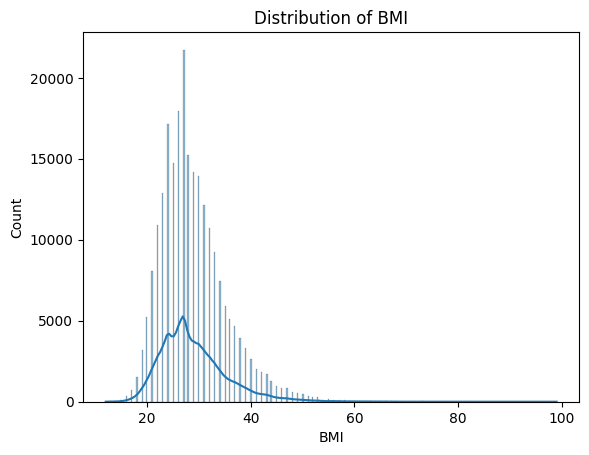

In [152]:
sns.histplot(df["BMI"],kde=True)
plt.title("Distribution of BMI")
plt.show()

BMI is right-skewed that is most people have around 22-30 as we can see from the graph while very less people are obsese.

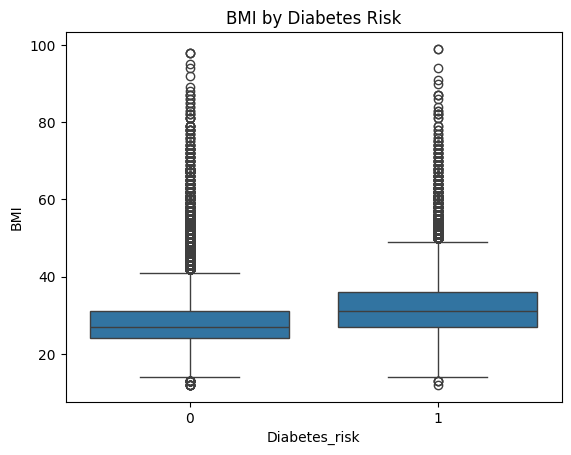

In [153]:
sns.boxplot(x="Diabetes_risk", y="BMI", data=df)
plt.title("BMI by Diabetes Risk")
plt.show()


Individuals with diabetes risk show a higher BMI distribution compared to those without diabetes risk. We see that there are outliers in the data but that are actually not outliers since this is data from survey and sometimes people do have extreme values and we are to know the cause of these extreme values. (That is what I have learnt. So outliers are not always need to be removed)

BMI showed a right-skewed distribution with extreme values. Therefore, a Mann–Whitney U test was used to compare BMI distributions between diabetes-risk groups, as it is a Non-parametric test that does not rely on normality assumptions and can used on nominal or ordinal data.

Setting up Hypothesis:
Ho: There is no significant differbnce between the median BMI of diabetic and Non diabetic people
H1: There is is significant differbnce between the median BMI of diabetic and Non diabetic people

taking 5% level of significance of all the testing here and below

In [154]:
bmi_diabetes = df[df["Diabetes_risk"]==1]["BMI"]
bmi_no_diabetes = df[df["Diabetes_risk"]==0]["BMI"]

stat, p = mannwhitneyu(bmi_diabetes, bmi_no_diabetes, alternative='two-sided')
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

Mann-Whitney U test statistic: 5129003173.5, p-value: 0.0


Since p-value < 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in BMI distributions between individuals with and without diabetes risk.

## 2. Is diabetes risk more common among people with high blood pressure?

In [155]:
pd.crosstab(df["HighBP"], df["Diabetes_risk"], normalize="index") * 100

Diabetes_risk,0,1
HighBP,,
0,91.808062,8.191938
1,71.772221,28.227779


People with high BP are more at risk of diabetes at 28% compared to the ones who do not have high bp. Diabetes risk is more than 3 times higher among individuals with high blood pressure.

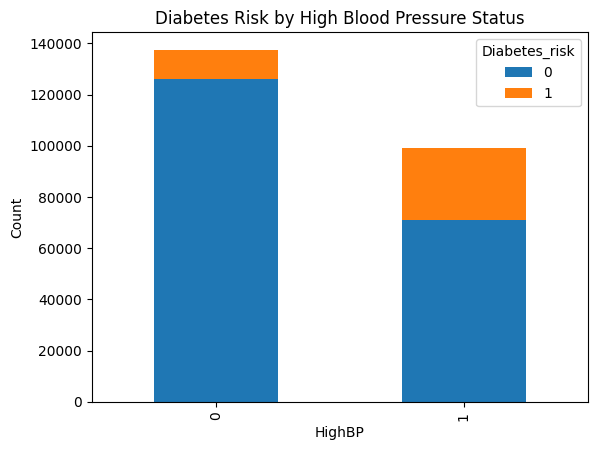

In [156]:
pd.crosstab(df["HighBP"], df["Diabetes_risk"]).plot(kind="bar", stacked=True)
plt.title("Diabetes Risk by High Blood Pressure Status")
plt.ylabel("Count")
plt.show()


H₀: Diabetes risk is independent of high blood pressure
H₁: Diabetes risk is associated with high blood pressure

In [157]:
table = pd.crosstab(df["HighBP"], df["Diabetes_risk"])
chi2, p, dof, expected = chi2_contingency(table)

chi2, p


(16696.739871114, 0.0)

A chi-square test confirms a statistically significant association between high blood pressure and diabetes risk (p < 0.05).

## 3. Does diabetes risk differ between males and females?

In [158]:
pd.crosstab(df["Sex"], df["Diabetes_risk"], normalize="index") * 100

Diabetes_risk,0,1
Sex,,
0,84.547642,15.452358
1,82.191647,17.808353


H₀: Diabetes risk is independent of gender
H₁: Diabetes risk is associated with gender

In [159]:
table = pd.crosstab(df["Sex"], df["Diabetes_risk"])
chi2, p, dof, expected = chi2_contingency(table)

chi2, p

(236.54450757081116, 2.229356191367692e-53)

The proportion of individuals at diabetes risk is higher among males (17.81%) compared to females (15.45%). A chi-square test of independence indicates that diabetes risk is significantly associated with gender. This suggests that males are more likely to be at diabetes risk than females in the studied population.

## 4. Are people who regularly consume fruits and vegetables less likely to be at diabetes risk?

1) H₀: Diabetes risk is independent of fruits consumption
   H₁: Diabetes risk is associated with fruits consumption

2) H₀: Diabetes risk is independent of vegeatables consumption
   H₁: Diabetes risk is associated with vegeatables consumption

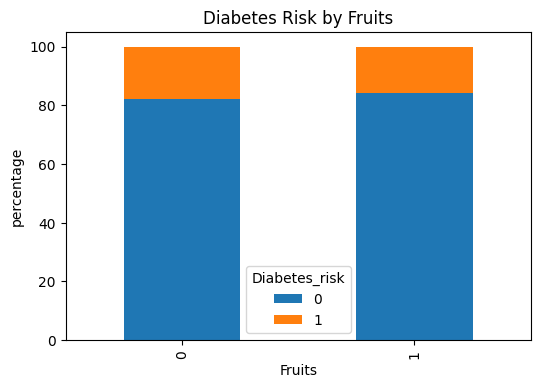

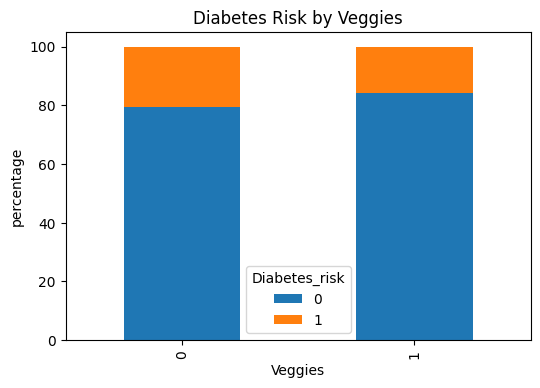

,Variable,DiabetesRisk_%_No,DiabetesRisk_%_Yes,p_value
0,Fruits,18.048388,15.681775,7.062549e-51
1,Veggies,20.450973,15.772285,6.053043e-118


In [160]:
consume = [
    "Fruits", "Veggies"]

results = []

for col in consume:
    table = pd.crosstab(df[col], df["Diabetes_risk"])
    (pd.crosstab(df[col], df["Diabetes_risk"], normalize="index") * 100).plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title(f"Diabetes Risk by {col}")
    plt.ylabel("percentage")
    plt.show()

    chi2, p, dof, expected = chi2_contingency(table)
    prop = pd.crosstab(df[col], df["Diabetes_risk"], normalize="index") * 100
    
    results.append({
        "Variable": col,
        "DiabetesRisk_%_No": prop.loc[0, 1],
        "DiabetesRisk_%_Yes": prop.loc[1, 1],
        "p_value": p
    })

results_df = pd.DataFrame(results)
results_df

Individuals who do not consume fruits or vegetables one or more times per day show higher diabetes risk compared to those who do. The chi-square test results indicate that both fruit and vegetable consumption are significantly associated with diabetes risk, as the p-values are less than 0.05. Therefore, we reject the null hypothesis of independence and conclude that daily fruit and vegetable consumption is associated with lower diabetes risk.

## 5. Is difficulty in walking associated with higher diabetes risk?

In [161]:
pd.crosstab(df["DiffWalk"], df["Diabetes_risk"], normalize="index") * 100

Diabetes_risk,0,1
DiffWalk,,
0.0,86.804708,13.195292
1.0,64.830998,35.169002


H₀: Diabetes risk is independent of difficulty in walking or climbing

H₁: Diabetes risk is associated with  difficulty in walking or climbing

In [162]:
table = pd.crosstab(df["DiffWalk"], df["Diabetes_risk"])
chi2, p, dof, expected = chi2_contingency(table)

chi2, p


(10747.477628484874, 0.0)

Individuals who have serious difficulty in walking or climbing stairs show two times more diabetic risk than individuals who do not have difficulty in walking or climbing stairs. And since, the p-value is < 0.05 we reject the null hypothesis and conclude that diabetes risk is associated with  difficulty in walking or climbing.

## 6. How does overall health (general, physical, and mental health) relate to diabetes risk?

Ho: There is no significant difference between the median General Health of diabetic and Non diabetic people
H1: There is a significant difference between the median General Health of diabetic and Non diabetic people

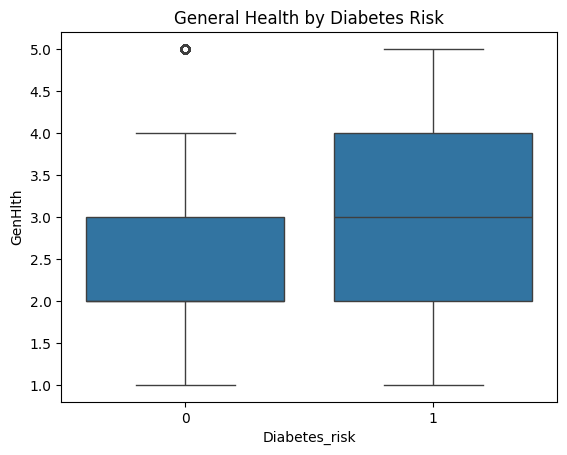

(2256337039.5, 0.0)

In [163]:
sns.boxplot(x="Diabetes_risk", y="GenHlth", data=df)
plt.title("General Health by Diabetes Risk")
plt.show()

grp0 = df[df["Diabetes_risk"] == 0]["GenHlth"]
grp1 = df[df["Diabetes_risk"] == 1]["GenHlth"]

u, p = mannwhitneyu(grp0, grp1, alternative="two-sided")
u, p


From the boxplot, we observe that individuals with diabetes risk report poorer general health compared to non-diabetic individuals.

For individuals with diabetes risk, the median general health score is 3, with most values lying between 2 and 4. In contrast, non-diabetic individuals have a lower median general health score of around 2, with most values between 1 and 3.

Since the p-value from the Mann–Whitney U test is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the median general health scores between diabetic-risk and non-diabetic individuals.

Physical Health
Ho: There is no significant difference between the median Physical Health of diabetic and Non diabetic people
H1: There is a significant difference between the median Physical Health of diabetic and Non diabetic people

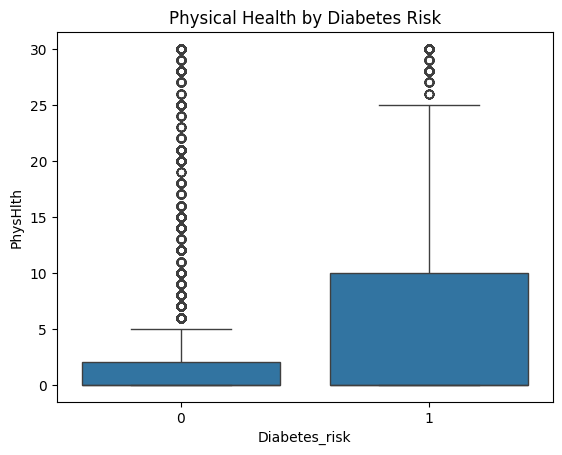

(3153057440.5, 0.0)

In [164]:
sns.boxplot(x="Diabetes_risk", y="PhysHlth", data=df)
plt.title("Physical Health by Diabetes Risk")
plt.show()

grp0 = df[df["Diabetes_risk"] == 0]["PhysHlth"]
grp1 = df[df["Diabetes_risk"] == 1]["PhysHlth"]

u, p = mannwhitneyu(grp0, grp1, alternative="two-sided")
u, p


The boxplot shows that individuals with diabetes risk report a higher number of physically unhealthy days compared to non-diabetic individuals.

For non-diabetic individuals, the median number of physically unhealthy days is 0, with the interquartile range mostly concentrated between 0 and a few days. For individuals with diabetes risk, the median is higher, and the interquartile range extends to a larger number of unhealthy days.

As the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the median number of physically unhealthy days between diabetic-risk and non-diabetic individuals.

Mental Health
Ho: There is no significant difference between the median Mental Health of diabetic and Non diabetic people
H1: There is a significant difference between the median Mental Health of diabetic and Non diabetic people

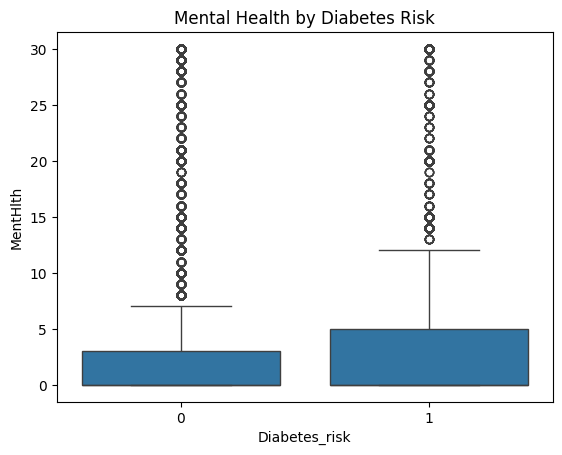

(3815216952.5, 6.426590155097372e-06)

In [165]:
import seaborn as sns
from scipy.stats import mannwhitneyu

sns.boxplot(x="Diabetes_risk", y="MentHlth", data=df)
plt.title("Mental Health by Diabetes Risk")
plt.show()

grp0 = df[df["Diabetes_risk"] == 0]["MentHlth"]
grp1 = df[df["Diabetes_risk"] == 1]["MentHlth"]

u, p = mannwhitneyu(grp0, grp1, alternative="two-sided")
u, p


The boxplot indicates that individuals with diabetes risk tend to report more mentally unhealthy days compared to non-diabetic individuals.

Non-diabetic individuals have a median of 0 mentally unhealthy days, with most observations concentrated at lower values. In contrast, individuals with diabetes risk show a higher median and a wider interquartile range, indicating poorer mental health on average.

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the median number of mentally unhealthy days between diabetic-risk and non-diabetic individuals.

## 7. Are people who delay medical care due to cost more likely to be at diabetes risk?

Ho: There is no significant association between cost-related avoidance of doctor visits and diabetes risk.
H1: There is a significant association between cost-related avoidance of doctor visits and diabetes risk.

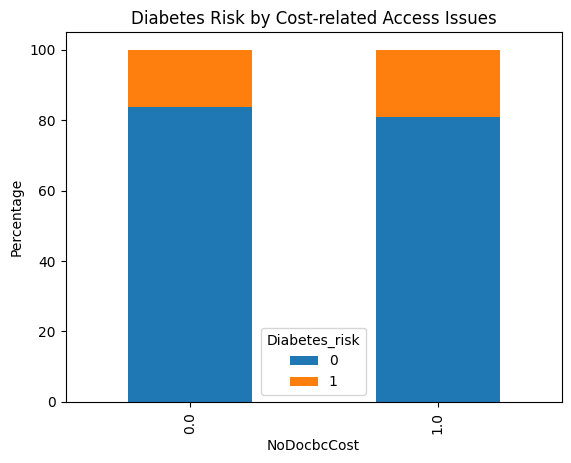

(80.72814080199157, 2.590073317984256e-19)

In [166]:
ct = pd.crosstab(df["NoDocbcCost"], df["Diabetes_risk"], normalize="index") * 100

ct.plot(kind="bar", stacked=True)
plt.title("Diabetes Risk by Cost-related Access Issues")
plt.ylabel("Percentage")
plt.show()

chi2, p, dof, expected = chi2_contingency(pd.crosstab(df["NoDocbcCost"], df["Diabetes_risk"]))

chi2, p

Individuals who could not see a doctor due to cost show higher diabetes risk compared to those who were able to access medical care. Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant association between cost-related avoidance of doctor visits and diabetes risk.

## 8. Among people at diabetes risk, does age distribution differ between males and females?

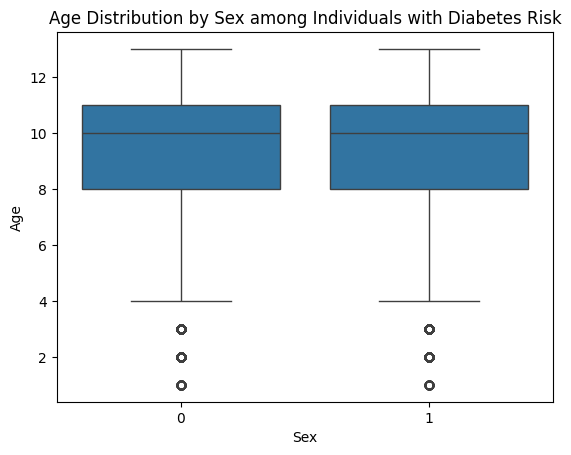

(198894914.5, 1.849424718132141e-10)

In [167]:
df_d = df[df["Diabetes_risk"] == 1]

sns.boxplot(x="Sex", y="Age", data=df_d)
plt.title("Age Distribution by Sex among Individuals with Diabetes Risk")
plt.show()

male = df_d[df_d["Sex"] == 1]["Age"]
female = df_d[df_d["Sex"] == 0]["Age"]

u, p = mannwhitneyu(male, female, alternative="two-sided")
u, p 


The age distribution among individuals with diabetes risk appears similar for males and females. The medians and interquartile ranges show substantial overlap, suggesting no notable difference in age patterns between the two sexes within the diabetic-risk population. 
But the p-valus is < 0.05 which shows we reject null hypothesis and concldue that there is a significant differences between median ages of diabetic males and females.

## 9. Is diabetes risk higher among individuals with lower education or income levels?

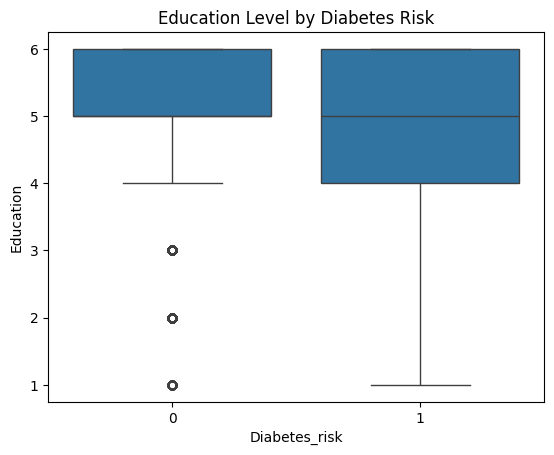

(4467746894.0, 0.0)

In [168]:
sns.boxplot(x="Diabetes_risk", y="Education", data=df)
plt.title("Education Level by Diabetes Risk")
plt.show()

u, p = mannwhitneyu(
    df[df["Diabetes_risk"] == 0]["Education"],
    df[df["Diabetes_risk"] == 1]["Education"]
)

u, p 


The boxplot shows that individuals with diabetes risk tend to have lower education levels compared to non-diabetic individuals. Although there is overlap between the two groups, the median education level is lower among those with diabetes risk.

The Mann–Whitney U test yields a p-value less than 0.05, leading us to reject the null hypothesis and conclude that there is a statistically significant difference in education levels between diabetic-risk and non-diabetic individuals.

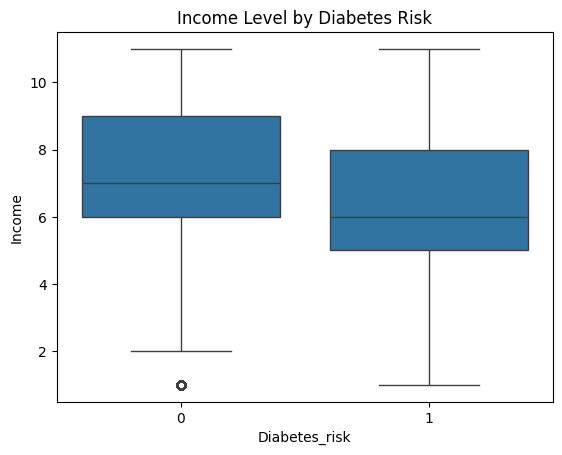

(4813707362.0, 0.0)

In [169]:
sns.boxplot(x="Diabetes_risk", y="Income", data=df)
plt.title("Income Level by Diabetes Risk")
plt.show()

u, p = mannwhitneyu(
    df[df["Diabetes_risk"] == 0]["Income"],
    df[df["Diabetes_risk"] == 1]["Income"]
)
u, p 

The income distribution differs between individuals with and without diabetes risk. Non-diabetic individuals have a higher median income level, while individuals with diabetes risk tend to fall into lower income categories.

Since the p-value from the Mann–Whitney U test is less than 0.05, we reject the null hypothesis and conclude that income level is significantly associated with diabetes risk.

## 10. Which factors are most strongly associated with diabetes risk?

1. HighChol
H₀: Diabetes risk is independent of high cholesterol
H₁: Diabetes risk is associated with high cholesterol

2. Smoker
H₀: Diabetes risk is independent of smoking status
H₁: Diabetes risk is associated with smoking status

3. Stroke
H₀: Diabetes risk is independent of stroke history
H₁: Diabetes risk is associated with stroke history

4. HeartDiseaseorAttack
H₀: Diabetes risk is independent of heart disease or attack
H₁: Diabetes risk is associated with heart disease or attack

5. PhysActivity
H₀: Diabetes risk is independent of physical activity
H₁: Diabetes risk is associated with physical activity

6. HvyAlcoholConsump
H₀: Diabetes risk is independent of heavy alcohol consumption
H₁: Diabetes risk is associated with heavy alcohol consumption


In [170]:
binary = [
    "HighChol", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity",
    "HvyAlcoholConsump"
]

results = []

for col in binary:
    table = pd.crosstab(df[col], df["Diabetes_risk"])
    chi2, p, dof, expected = chi2_contingency(table)
    prop = pd.crosstab(df[col], df["Diabetes_risk"], normalize="index") * 100
    
    results.append({
        "Variable": col,
        "DiabetesRisk_%_No": prop.loc[0, 1],
        "DiabetesRisk_%_Yes": prop.loc[1, 1],
        "p_value": p
    })

results_df = pd.DataFrame(results)
results_df


,Variable,DiabetesRisk_%_No,DiabetesRisk_%_Yes,p_value
0,HighChol,10.225697,26.025379,0.000000e+00
1,Smoker,14.766424,19.163749,4.569262e-176
2,Stroke,15.834371,34.953779,0.000000e+00
3,HeartDiseaseorAttack,14.611430,37.335028,0.000000e+00
4,PhysActivity,26.963687,13.635697,0.000000e+00
5,HvyAlcoholConsump,17.133282,8.190801,5.887530e-175


From the cross-tabulated values, we observe that individuals with high cholesterol have more than twice the diabetes risk compared to those without high cholesterol. Smokers also show a higher diabetes risk than non-smokers.

People who suffered a stroke in the last 30 days have a higher diabetes risk compared to those who did not experience a stroke. Similarly, individuals with coronary heart disease (CHD) or myocardial infarction show more than double the diabetes risk.

Individuals who were physically inactive in the last 30 days (excluding work-related activity) have a higher diabetes risk compared to those who were physically active.

Interestingly, individuals who are not heavy drinkers show a higher diabetes risk compared to heavy drinkers.

Since the p-values for all variables are less than 0.05, we reject the null hypothesis of independence and conclude that high cholesterol, smoking, stroke, coronary heart disease or myocardial infarction, physical activity, and alcohol consumption are significantly associated with diabetes risk.

Fitting a logistic Regression with all features.

In [171]:
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

In [172]:
X = df[features]
X = sm.add_constant(X)  

y = df["Diabetes_risk"]

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()


Optimization terminated successfully.
         Current function value: 0.361794
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Diabetes_risk   No. Observations:               236378
Model:                          Logit   Df Residuals:                   236356
Method:                           MLE   Df Model:                           21
Date:                Fri, 02 Jan 2026   Pseudo R-squ.:                  0.1945
Time:                        19:41:35   Log-Likelihood:                -85520.
converged:                       True   LL-Null:                   -1.0617e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.1309      0.093    -76.479      0.000      -7.314      -6.948
HighBP                   0.6592      0.014     47.819      0.000       0.632       0.686
HighChol                 0.5884      0.013     45.672      0.000       0.563       0.614
CholCheck                1.3746      0.069     19.968      0.000       1.240       1.510
BMI                      0.0608      0.001     64.952      0.000       0.059       0.063
Smoker                  -0.0627      0.013     -4.892      0.000      -0.088      -0.038
Stroke                   0.1524      0.026      5.951      0.000       0.102       0.203
HeartDiseaseorAttack     0.2430      0.018     13.326      0.000       0.207       0.279
PhysActivity            -0.1579      0.014    -10.923      0.000      -0.186      -0.130
Fruits                  -0.0358      0.013     -2.756      0.006      -0.061      -0.010
Veggies                 -0.0247      0.016     -1.545      0.122      -0.056       0.007
HvyAlcoholConsump       -0.6422      0.033    -19.516      0.000      -0.707      -0.578
AnyHealthcare            0.0505      0.039      1.301      0.193      -0.026       0.126
NoDocbcCost              0.0788      0.026      3.016      0.003       0.028       0.130
GenHlth                  0.4609      0.008     58.573      0.000       0.446       0.476
MentHlth                -0.0031      0.001     -3.769      0.000      -0.005      -0.001
PhysHlth                -0.0063      0.001     -7.968      0.000      -0.008      -0.005
DiffWalk                 0.1023      0.017      6.055      0.000       0.069       0.135
Sex                      0.2522      0.013     19.637      0.000       0.227       0.277
Age                      0.1195      0.003     46.731      0.000       0.114       0.124
Education               -0.0415      0.007     -5.908      0.000      -0.055      -0.028
Income                  -0.0563      0.003    -18.119      0.000      -0.062      -0.050
========================================================================================
"""

In [173]:
odds_ratios = np.exp(result.params)

conf = result.conf_int()
conf.columns = ["Lower", "Upper"]
conf_exp = np.exp(conf)

or_table = pd.DataFrame({
    "Odds_Ratio": odds_ratios,
    "CI_Lower": conf_exp["Lower"],
    "CI_Upper": conf_exp["Upper"],
    "p_value": result.pvalues
})

or_table.sort_values("Odds_Ratio", ascending=False)


,Odds_Ratio,CI_Lower,CI_Upper,p_value
CholCheck,3.953409,3.454417,4.524481,1.053286e-88
HighBP,1.933232,1.881698,1.986177,0.000000e+00
HighChol,1.801095,1.756187,1.847152,0.000000e+00
GenHlth,1.585558,1.561291,1.610203,0.000000e+00
Sex,1.286859,1.254870,1.319664,7.502552e-86
HeartDiseaseorAttack,1.275013,1.230258,1.321396,1.627900e-40
Stroke,1.164614,1.107607,1.224555,2.661666e-09
Age,1.126899,1.121267,1.132560,0.000000e+00
DiffWalk,1.107747,1.071657,1.145053,1.402811e-09
NoDocbcCost,1.082008,1.027981,1.138874,2.561789e-03


Fitting a logistic regression with selected variables

In [174]:
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack','HvyAlcoholConsump','NoDocbcCost','Sex',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

During feature selection, I deliberately excluded the variable CholCheck because it indicates whether an individual had their cholesterol checked in the last five years. This variable shows diagnostic or healthcare utilization behavior rather than underlying diabetes risk.

The variable AnyHealthcare was also excluded because having health insurance does not directly determine whether an individual is at diabetes risk. While it may be useful for studying access to care or the economic burden of diabetes but is not appropriate for identifying key predictors of diabetes risk.

Variables related to healthy behaviors such as physical activity and fruit and vegetable consumption were not included because these behaviors are expected to be protective rather than causal risk factors. Therefore, the final model was fitted using the remaining variables to identify the most relevant independent predictors of diabetes risk.

In [175]:
X = df[features]
X = sm.add_constant(X)  

y = df["Diabetes_risk"]

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()


Optimization terminated successfully.
         Current function value: 0.371219
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Diabetes_risk   No. Observations:               236378
Model:                          Logit   Df Residuals:                   236362
Method:                           MLE   Df Model:                           15
Date:                Fri, 02 Jan 2026   Pseudo R-squ.:                  0.1735
Time:                        19:41:38   Log-Likelihood:                -87748.
converged:                       True   LL-Null:                   -1.0617e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.8042      0.054    -89.702      0.000      -4.909      -4.699
HighBP                   0.7614      0.014     55.974      0.000       0.735       0.788
HighChol                 0.6415      0.013     50.352      0.000       0.616       0.666
BMI                      0.0688      0.001     74.557      0.000       0.067       0.071
Smoker                  -0.0225      0.013     -1.781      0.075      -0.047       0.002
Stroke                   0.2329      0.025      9.175      0.000       0.183       0.283
HeartDiseaseorAttack     0.3802      0.018     21.198      0.000       0.345       0.415
HvyAlcoholConsump       -0.6695      0.033    -20.533      0.000      -0.733      -0.606
NoDocbcCost              0.0962      0.025      3.820      0.000       0.047       0.146
Sex                      0.2497      0.013     19.762      0.000       0.225       0.274
MentHlth                 0.0023      0.001      2.904      0.004       0.001       0.004
PhysHlth                 0.0122      0.001     16.991      0.000       0.011       0.014
DiffWalk                 0.2899      0.016     17.628      0.000       0.258       0.322
Age                      0.1231      0.002     49.319      0.000       0.118       0.128
Education               -0.0841      0.007    -12.274      0.000      -0.098      -0.071
Income                  -0.0782      0.003    -25.862      0.000      -0.084      -0.072
========================================================================================
"""

In [176]:
odds_ratios = np.exp(result.params)

conf = result.conf_int()
conf.columns = ["Lower", "Upper"]
conf_exp = np.exp(conf)

or_table = pd.DataFrame({
    "Odds_Ratio": odds_ratios,
    "CI_Lower": conf_exp["Lower"],
    "CI_Upper": conf_exp["Upper"],
    "p_value": result.pvalues
})

or_table.sort_values("Odds_Ratio", ascending=False)


,Odds_Ratio,CI_Lower,CI_Upper,p_value
HighBP,2.141219,2.084889,2.199072,0.000000e+00
HighChol,1.899233,1.852399,1.947251,0.000000e+00
HeartDiseaseorAttack,1.462629,1.412101,1.514966,1.005258e-99
DiffWalk,1.336325,1.293935,1.380105,1.515091e-69
Sex,1.283646,1.252247,1.315832,6.295772e-87
Stroke,1.262226,1.200970,1.326606,4.512968e-20
Age,1.131042,1.125520,1.136590,0.000000e+00
NoDocbcCost,1.100945,1.047938,1.156633,1.335398e-04
BMI,1.071250,1.069313,1.073190,0.000000e+00
PhysHlth,1.012321,1.010892,1.013752,9.516515e-65


Individuals with high blood pressure have approximately 2.14 times higher odds of being at diabetes risk compared to those without high blood pressure, holding other factors constant.

Similarly, individuals with high cholesterol exhibit nearly 1.90 times higher odds of diabetes risk relative to individuals without high cholesterol, after adjustment for other variables.

Additionally, individuals with a history of coronary heart disease or myocardial infarction show about 1.46 times higher odds of diabetes risk compared to those without such conditions, indicating a strong association between cardiovascular disease and diabetes risk.

These findings suggest that metabolic and cardiovascular conditions play a central role in identifying individuals at elevated risk for diabetes and highlight the importance of early screening and integrated management of blood pressure, cholesterol, and heart health to reduce diabetes risk.

High blood pressure, high cholesterol, and cardiovascular disease are identified as the strongest independent predictors of diabetes risk in the logistic regression model.